Starting with image processing

In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image, ImageEnhance, ImageOps
import os
import glob

# Define the paths
# for i in range(1,17,1):
input_path = 'OneDrive/Drone data hand/Right/Right 16.jpg'  # Replace with your input path
output_path = 'OneDrive/Drone data hand/Right trial'  # Replace with your output path

# Ensure output path exists
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print("Output directory created.")
if os.path.exists(output_path):
    print("Output directory exists.")
    
# Function to apply transformations
def augment_image(image_path, output_path):
    print(f"Processing image: {image_path}")
    # Open the image
    img = Image.open(image_path)

    # Rotation
    img_rotated = img.rotate(15)  # Rotate by 15 degrees

    # Scaling
    scale_factor = 1.2
    img_scaled = img.resize([int(scale_factor * s) for s in img.size])  # Scale by factor of 1.2

    # Cropping
    width, height = img.size
    left, upper, right, lower = width / 4, height / 4, 3 * width / 4, 3 * height / 4
    img_cropped = img.crop((left, upper, right, lower))  # Crop the center

    # Adjusting brightness
    enhancer = ImageEnhance.Brightness(img)
    img_brighter = enhancer.enhance(1.2)  # Increase brightness by 20%

    # Adjusting contrast
    contrast_enhancer = ImageEnhance.Contrast(img)
    img_high_contrast = contrast_enhancer.enhance(1.5)  # Increase contrast

    # Save the transformed images
    img_rotated.save(os.path.join(output_path, 'rotated_' + os.path.basename(image_path)))
    img_scaled.save(os.path.join(output_path, 'scaled_' + os.path.basename(image_path)))
    img_cropped.save(os.path.join(output_path, 'cropped_' + os.path.basename(image_path)))
    img_brighter.save(os.path.join(output_path, 'brighter_' + os.path.basename(image_path)))
    img_high_contrast.save(os.path.join(output_path, 'high_contrast_' + os.path.basename(image_path)))

# Apply transformations to each image in the input directory
# for image_file in glob.glob(input_path + '*.jpg'):  # Make sure this matches your file format
    # print(f"Found image file: {image_file}")
augment_image(input_path, output_path)

print("Image augmentation completed.")


Output directory exists.
Processing image: OneDrive/Drone data hand/Right/Right 16.jpg
Image augmentation completed.


Processing IMAGES DONE

Labelling images...
FOR CREATING A CSV FILE WITH IMAGE-PATH AS a column and LABEL as another column

In [3]:
import os
import csv

# Base directory where the folders are located
base_dir = 'OneDrive/Processed images'  # Replace with the path to your dataset

# CSV file to save the labels
output_csv = 'OneDrive/Drone data hand/Labelling images.csv'  # Replace with your desired output path

# Initialize an empty list to store the data
data = []

# Loop through each folder in the base directory
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Loop through each file in the folder
        for file_name in os.listdir(folder_path):
            # Construct the full file path
            file_path = os.path.join(folder_path, file_name)
            # Append the file path and folder name (label) to the list
            data.append([file_path, folder_name])

# Write the data to a CSV file
with open(output_csv, 'w', newline='') as file:
    writer = csv.writer(file)
    # Optionally write a header
    writer.writerow(['file_path', 'label'])
    # Write the data
    writer.writerows(data)

print("Labeling completed and saved to CSV.")


Labeling completed and saved to CSV.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


GETTING THE MEDIAPIPE MODEL FOR HAND RECOGNITION

In [5]:
pip install mediapipe 

Note: you may need to restart the kernel to use updated packages.


In [6]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [7]:
model_path = 'Downloads/hand_landmarker.task'

In [8]:
import cv2
img = cv2.imread("OneDrive/Processed images/Up trial/brighter_Up 1.jpg")
# cv2_imshow(img)

CODE FOR DRAWING LANDMARKS ON THE IMAGE so that it can be VISUALIZED


In [9]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

THIS CODE FOR VISUALIZING THE RECOGNIZED IMAGE 

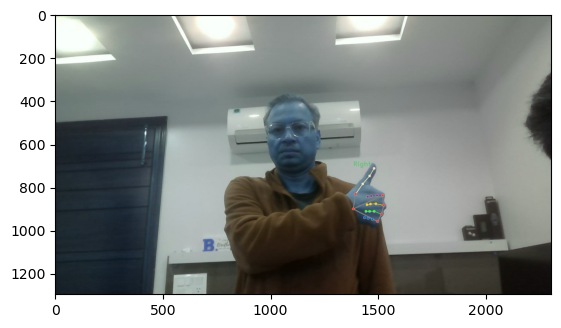

HandLandmarkerResult(handedness=[[Category(index=0, score=0.782922089099884, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.6015217900276184, y=0.6962822675704956, z=-2.458336041399889e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6059354543685913, y=0.6434058547019958, z=-0.009071935899555683, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6205554604530334, y=0.6072075963020325, z=-0.015798266977071762, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6343430876731873, y=0.5786557197570801, z=-0.02089856192469597, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6435315012931824, y=0.5511702299118042, z=-0.025258641690015793, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.660157322883606, y=0.6480130553245544, z=-0.013154104351997375, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6489056944847107, y=0.647605299949646, z=-0.015052152797579765, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6375

In [10]:
# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("OneDrive/Drone data hand/Up trial/scaled_Up 15.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)

from matplotlib import pyplot as plt
pred_img = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(pred_img)
plt.show()
print(detection_result)

GPT improvised code for creating csv file with many landmark cols and path and labels

Trying to get all row data in the csv file

In [11]:
import pandas as pd
import numpy as np
import cv2


# Read the CSV file
excel_path = 'OneDrive/Drone data hand/Labelling images new.xlsx'  # Update with your CSV file path
df = pd.read_excel(excel_path)

columns = ['image_path', 'label'] + ['handedness'] + [f'hand_landmark_{i}_{axis}' for i in range(21) for axis in ['x', 'y', 'z']] + \
          [f'hand_world_landmark_{i}_{axis}' for i in range(21) for axis in ['x', 'y', 'z']]
#df = pd.DataFrame(columns=columns)

all_rows = []

# Iterate over the image paths
for index, row in df.iterrows():
    image_path = row['file_path']  # Replace 'image_column' with the actual column name
    label = row['label']  # Replace 'label_column' with the name of the column containing labels

    base_options = python.BaseOptions(model_asset_path=model_path)
    options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
    detector = vision.HandLandmarker.create_from_options(options)

    # Load the image
    image = mp.Image.create_from_file(image_path)

    # Detect hand landmarks
    detection_result = detector.detect(image)

    # Process and visualize
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    # landmarks_to_csv(detection_result, 'Downloads/LABELLED IMGS - Sheet1.csv')
    
    # Assuming 'results' is your HandLandmarkerResult object

   # Extract handedness
    handedness = detection_result.handedness[0][0].category_name if detection_result.handedness and detection_result.handedness[0] else None

    # Extract landmarks
    hand_landmarks = [lm for lm in detection_result.hand_landmarks[0]] if detection_result.hand_landmarks and detection_result.hand_landmarks[0] else None
    hand_world_landmarks = [lm for lm in detection_result.hand_world_landmarks[0]] if detection_result.hand_world_landmarks and detection_result.hand_world_landmarks[0] else None

    # Flatten landmarks data if not None
    hand_landmarks_flat = [item for sublist in hand_landmarks for item in (sublist.x, sublist.y, sublist.z)] if hand_landmarks else [None] * 63
    hand_world_landmarks_flat = [item for sublist in hand_world_landmarks for item in (sublist.x, sublist.y, sublist.z)] if hand_world_landmarks else [None] * 63
        
    
    # Create a single row of data
    row_data = [image_path, label] + [handedness] + hand_landmarks_flat + hand_world_landmarks_flat 
    
    
    # Create a DataFrame and write to CSV
    #df = pd.DataFrame(columns=columns)
    #df = df.append(pd.DataFrame([row_data], columns=columns), ignore_index=True)
    #print(row_data)

    all_rows.append(row_data)

df_processed = pd.DataFrame(all_rows, columns=columns)  
df_processed.to_csv('OneDrive/Drone data hand/gpt_code_csvv.csv', index=False)
#print(all_rows)

print("completed")
# Note: You may want to handle exceptions and errors for images that can't be processed


completed


Staring the training process
Splitting the data

TRAIN TEST SPLIT IN CSV FILE
Step for later use

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Path to the labeled Excel file
csv_file = 'OneDrive/Drone data hand/gpt_code_csvv.csv'  # Replace with your Excel file path

# Load the dataset
df = pd.read_csv(csv_file)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Split the dataset into training, validation, and testing sets
train, test = train_test_split(df, test_size=0.3, stratify=df['label'])
validation, test = train_test_split(test, test_size=0.5, stratify=test['label'])

# Save the splits to new Excel files (optional)
train.to_csv('OneDrive/Drone data hand/train.csv', index=False)
validation.to_csv('OneDrive/Drone data hand/validation.csv', index=False)
test.to_csv('OneDrive/Drone data hand/test.csv', index=False)

print("Dataset split into training, validation, and test sets.")


Dataset split into training, validation, and test sets.


Training and testing dataset completed (as csv files)

CODE for REMOVING BLANK ROWS

In [13]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('OneDrive/Drone data hand/train.csv')
df1 = pd.read_csv('OneDrive/Drone data hand/test.csv')
df2 = pd.read_csv('OneDrive/Drone data hand/validation.csv')

# Assuming 'your_specific_column' is the column that might have values
# when all other columns are empty. Replace it with your actual column name
specific_column1 = 'image_path'
specific_column2 = 'label'

# Identify rows where all columns except 'your_specific_column' are empty
rows_to_drop = df[df.drop(columns=[specific_column1, specific_column2]).isna().all(axis=1)].index
rows_to_drop1 = df1[df1.drop(columns=[specific_column1, specific_column2]).isna().all(axis=1)].index
rows_to_drop2 = df2[df2.drop(columns=[specific_column1, specific_column2]).isna().all(axis=1)].index

# Drop these rows from the DataFrame
df.drop(rows_to_drop, inplace=True)
df1.drop(rows_to_drop1, inplace=True)
df2.drop(rows_to_drop2, inplace=True)

# Optionally, save the modified DataFrame back to CSV
df.to_csv('OneDrive/Drone data hand/modified_train.csv', index=False)
df1.to_csv('OneDrive/Drone data hand/modified_test.csv', index=False)
df2.to_csv('OneDrive/Drone data hand/modified_validation.csv', index=False)


In [33]:
traindata = pd.read_csv('OneDrive/Drone data hand/modified_train.csv')
validata = pd.read_csv('OneDrive/Drone data hand/modified_validation.csv')
testdata = pd.read_csv('OneDrive/Drone data hand/modified_test.csv')

temp = traindata

In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [27]:
ToEncodeCols = ['handedness', 'label']
# ToEncodeCols1 = ['label']

ordinal = OrdinalEncoder()
traindata[ToEncodeCols]= ordinal.fit_transform(traindata[ToEncodeCols])
validata[ToEncodeCols]= ordinal.transform(validata[ToEncodeCols])

# y_tr[ToEncodeCols]= ordinal.fit_transform(y_tr[ToEncodeCols1])
# y_v[ToEncodeCols]= ordinal.transform(y_v[ToEncodeCols1])


DATA into X and y for model training

In [28]:
X_tr = traindata.drop(['label', 'image_path'] , axis = 1)
y_tr = traindata.label

X_v = validata.drop(['label', 'image_path'] , axis = 1)
y_v = validata.label
# X_tr.head()
# y_tr.head()

In [19]:
X_tr.shape
X_tr.head()

,handedness,hand_landmark_0_x,hand_landmark_0_y,hand_landmark_0_z,hand_landmark_1_x,hand_landmark_1_y,hand_landmark_1_z,hand_landmark_2_x,hand_landmark_2_y,hand_landmark_2_z,...,hand_world_landmark_17_z,hand_world_landmark_18_x,hand_world_landmark_18_y,hand_world_landmark_18_z,hand_world_landmark_19_x,hand_world_landmark_19_y,hand_world_landmark_19_z,hand_world_landmark_20_x,hand_world_landmark_20_y,hand_world_landmark_20_z
0,1.0,0.357285,0.612401,-8.385675e-08,0.407051,0.717068,-0.016231,0.460700,0.786168,-0.028730,...,-0.005178,-0.000792,-0.039091,-0.019965,-0.009336,-0.027123,-0.029072,-0.020658,-0.022351,-0.019529
1,1.0,0.460833,0.380802,1.390146e-07,0.511334,0.362083,-0.019138,0.546321,0.298317,-0.023910,...,-0.016300,-0.029059,-0.015263,-0.016182,-0.022359,-0.036679,-0.020503,-0.017034,-0.062128,-0.027531
2,1.0,0.788910,0.607336,-9.558566e-08,0.756590,0.572885,-0.010713,0.739391,0.523194,-0.017884,...,0.021433,0.024137,-0.017458,0.025307,0.022627,-0.037084,0.034008,0.017284,-0.053988,0.040475
3,1.0,0.601522,0.696282,-2.458336e-07,0.605935,0.643406,-0.009072,0.620555,0.607208,-0.015798,...,-0.005762,-0.019895,0.020432,0.004639,-0.025773,0.018677,0.008329,-0.036243,0.018720,0.007667
4,1.0,0.473746,0.514640,-5.742487e-08,0.431368,0.456097,-0.003069,0.415556,0.379725,-0.006864,...,0.015816,0.036586,-0.008425,0.017726,0.042566,-0.031917,0.020984,0.038584,-0.050921,0.027596


In [29]:
X_tr = np.ascontiguousarray(X_tr)
X_v = np.ascontiguousarray(X_v)


In [30]:
classifiers = [KNeighborsClassifier(15), LinearDiscriminantAnalysis(), RandomForestClassifier(n_estimators= 250, random_state=0), AdaBoostClassifier(random_state=0), GradientBoostingClassifier(n_estimators= 260, random_state=0)]

def smallpipe(X_train_t, X_train_v, z_t, z_v):
    z = []
    for model in classifiers:
        model.fit(X_train_t, z_t)
        preds = model.predict(X_train_v)
        y = mean_absolute_error(z_v, preds)
        z.append(y)
        print(mean_absolute_error(z_v, preds),"--Model name--", model)
    return(z)

print("MAE is")
print(smallpipe(X_tr, X_v, y_tr, y_v))

MAE is
0.3880597014925373 --Model name-- KNeighborsClassifier(n_neighbors=15)
0.0 --Model name-- LinearDiscriminantAnalysis()
0.0 --Model name-- RandomForestClassifier(n_estimators=250, random_state=0)
0.5223880597014925 --Model name-- AdaBoostClassifier(random_state=0)
0.04477611940298507 --Model name-- GradientBoostingClassifier(n_estimators=260, random_state=0)
[0.3880597014925373, 0.0, 0.0, 0.5223880597014925, 0.04477611940298507]


In [ ]:
print(temp)

In [35]:
ToEncodeCol = ['handedness']

X_temp = temp.drop(['label', 'image_path'] , axis = 1)
X_test = testdata.drop(['label', 'image_path'] , axis = 1)

fin_ordinal = OrdinalEncoder()
X_temp[ToEncodeCol]= fin_ordinal.fit_transform(X_temp[ToEncodeCol])
X_test[ToEncodeCol]= fin_ordinal.transform(X_test[ToEncodeCol])

In [36]:
X_temp = np.ascontiguousarray(X_temp)
X_test = np.ascontiguousarray(X_test)

In [37]:
finalmodel = RandomForestClassifier(n_estimators= 250, random_state=0)
finalmodel.fit(X_temp, y_tr)
finalpreds = finalmodel.predict(X_test)

print("complete as of now ")

complete as of now 


In [38]:
output = pd.DataFrame({'LABEL': finalpreds})
output.to_csv('OneDrive/Drone data hand/try1.csv', index=False)

In [40]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [41]:
model_path1 = "OneDrive/Drone data hand/hand_landmarker (2).task"

In [42]:
image = "OneDrive/Drone data hand/WIN_20240123_18_23_09_Pro.jpg"



In [43]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


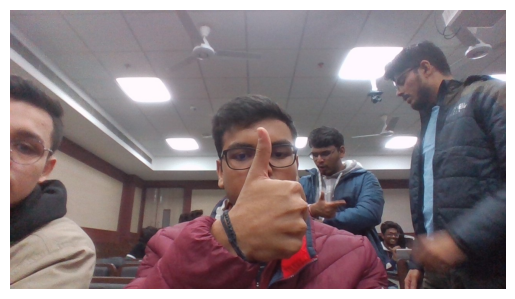

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image file (replace 'your_image.png' with the path to your image)
image_path = "OneDrive/Drone data hand/WIN_20240123_18_23_09_Pro.jpg"
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and labels
plt.show()


In [45]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# finalmodel.save("OneDrive/Drone data hand")

In [47]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [54]:
from joblib import dump

# Assume 'model' is your trained RandomForestClassifier
dump(finalmodel, 'OneDrive/Drone data hand/random_forest_model.joblib')


['OneDrive/Drone data hand/random_forest_model.joblib']